In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imageprocess.align.align import ImageAlign
from imageprocess.utils import io, conversions

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
img = io.read_image("C:/Users/ellpo/Desktop/IMG-20230211-WA0000.jpg")
img.shape

(2016, 1134, 3)

In [4]:
img.dtype

dtype('uint8')

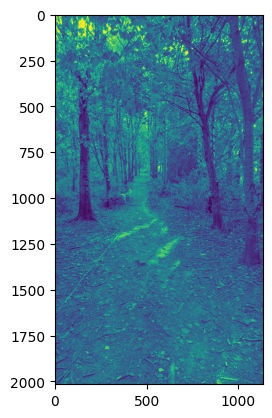

In [5]:
plt.imshow(conversions.conv_to_greyscale(img))
plt.show()

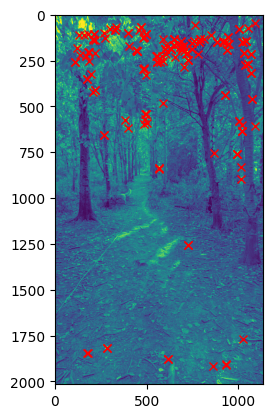

In [33]:
aligner = ImageAlign(detection_threshold=0.01)
aligner.detect_features([cv2.GaussianBlur(conversions.conv_to_greyscale(img), (9,9), 0)])

x = [kp.pt[0] for kp in aligner.keypoints[0]]
y = [kp.pt[1] for kp in aligner.keypoints[0]]

plt.imshow(conversions.conv_to_greyscale(img))
plt.plot(x, y, 'x', c='red')
plt.show()

#TODO: create plotting.py in utils

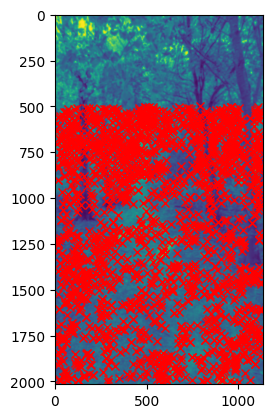

In [44]:
import numpy as np
import cv2

mask = np.zeros_like(img[:,:,0])
mask[500:, :] = 1

img_tmp = conversions.conv_to_greyscale(img)
img_tmp = cv2.GaussianBlur(img_tmp, (21,21), 3)

#finder = cv2.AKAZE.create(diffusivity=cv2.KAZE_DIFF_PM_G1, threshold=0.01)
finder = cv2.SIFT_create()
keypoints, desc = finder.detectAndCompute(
    img_tmp,
    mask=mask
)
x = [kp.pt[0] for kp in keypoints]
y = [kp.pt[1] for kp in keypoints]

plt.imshow(img_tmp)
plt.plot(x, y, 'x', c='red')
plt.show()